In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from cot.config import SAVE_DIR

WIDTH = 5.5            # inches (from ICML style file)
HEIGHT = 5.5 / 1.5     # golden ratio


rc('font', family='serif', size=8)
usetex = not subprocess.run(['which', 'pdflatex']).returncode
rc('text', usetex=usetex)
if usetex:
    rc('text.latex', preamble=r'\usepackage{times}')

/home/vivc/.local/share/texlive/2022/bin/x86_64-linux/pdflatex


In [3]:
attention_eval = True
pb1, pb2 = "polynomial", "parity"
problems = [pb1, pb2]
exp = 4

save_dir = SAVE_DIR / f"res-cot-pretrain{exp}"

x = np.arange(4, 32)
y = np.arange(4, 64)
t = np.arange(0, 1001, 10)

Z1, Z2, Z3, Z4 = {}, {}, {}, {}

for problem in problems:
    Z1[problem] = np.load(save_dir / f"train_acc_{problem}.npy")
    Z2[problem] = np.load(save_dir / f"test_acc_{problem}.npy")

    if attention_eval:
        Z3[problem] = np.load(save_dir / f"attn0_{problem}.npy")
        Z4[problem] = np.load(save_dir / f"attn1_{problem}.npy")

pb = "parity"
exp = 5
fproblems = [pb]
save_dir = SAVE_DIR / f"res-cot-finetune{exp}"

for problem in fproblems:
    Z1["f" + problem] = np.load(save_dir / f"train_acc_{problem}.npy")
    Z2["f" + problem] = np.load(save_dir / f"test_acc_{problem}.npy")

    if attention_eval:
        Z3["f" + problem] = np.load(save_dir / f"attn0_{problem}.npy")
        Z4["f" + problem] = np.load(save_dir / f"attn1_{problem}.npy")

In [4]:
for Zi in (
    list(Z1.values())
    + list(Z2.values())
    + list(Z3.values())
    + list(Z4.values())
):
    # tmp = np.repeat(Zi.mean(axis=1)[:, np.newaxis], Zi.shape[1], axis=1)
    # Zi[Zi == -1] = tmp[Zi == -1]
    Zi[Zi == -1] = .5
    # pass

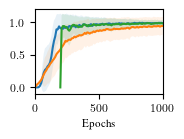

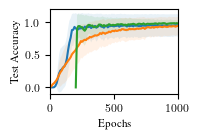

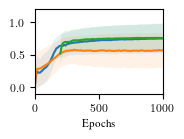

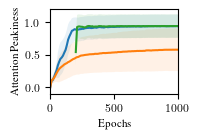

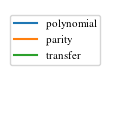

In [5]:
t = np.arange(0, 1001, 10)
leg = []

for i, Z in enumerate([Z1, Z2, Z3, Z4]):
    fig, ax = plt.subplots(1, 1, figsize=(.3 * WIDTH, .3 * HEIGHT))
    for pb in problems :
        data = Z[pb]
        tmp = data[data.std(axis=1) != 0]
        tmp_mean = tmp.mean(axis=0)
        tmp_std = tmp.std(axis=0)
        a, = ax.plot(t, tmp_mean)
        ax.fill_between(t, tmp_mean + tmp_std, tmp_mean - tmp_std, alpha=.1)
        if i == 0:
            leg.append(a)

    for pb in fproblems:
        data = Z["f" + pb]
        tmp = data[data.std(axis=1) != 0]
        tmp_mean = tmp.mean(axis=0)
        tmp_std = tmp.std(axis=0)
        a, = ax.plot(t + 200, tmp_mean)
        ax.fill_between(t + 200, tmp_mean + tmp_std, tmp_mean - tmp_std, alpha=.1)
        if i == 0:
            leg.append(a)
    ax.set_ylim(-.1, 1.2)
    ax.set_xlim(0, 1000)
    ax.set_xlabel('Epochs')

    if i == 1:
        ax.set_ylabel('Test Accuracy')
        # fig.savefig('test_acc_trans.pdf', bbox_inches="tight")
    if i == 3:
        ax.set_ylabel('Attention Peakiness')
        # fig.savefig('ith_trans.pdf', bbox_inches="tight")

fig, ax = plt.subplots(1, 1, figsize=(.2 * WIDTH, .35 * HEIGHT))
ax.legend(leg, ['polynomial', 'parity', 'transfer'])
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('leg_trans.pdf', bbox_inches="tight")